<a href="https://colab.research.google.com/github/triod315/AI-courses-src/blob/master/EO/EO_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Підключення DEAP
!pip install deap
!cp /content/drive/MyDrive/Colab\ Notebooks/tsp_cities/map10.dat .
!cp /content/drive/MyDrive/Colab\ Notebooks/tsp_cities/map50.dat .

In [1]:
#@title Підключення бібліотек
import os
import array
import random
from urllib.request import urlopen
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
#@title Ініціалізація змінних, визначення функцій, створення екземалярів класів "зали слави" і статистики з реєстрацією необхідних статистичних функцій

def draw_plot(city_map, individual=None):
  plt.axis('equal')
  plt.plot(city_map[1:,0], city_map[1:, 1],'bo', markersize=3)
  plt.plot(city_map[0,0], city_map[0,1], 'go', markersize=5)
  plt.gca().set_aspect('equal', adjustable='box')

  if individual==None:
    plt.show()
    return
  last_city_index=individual.index(0)-1
  if last_city_index < 0:
    last_city_index=cities_count-1

  last_city=individual[last_city_index]
  path=np.append(cities[individual], [cities[individual][0]], axis=0)
  plt.plot(path[:,0], path[:,-1])

  plt.plot(cities[last_city, 0], cities[last_city, 1], 'ro')
  plt.show()


def get_distance(a, b):
  return math.sqrt(math.pow(b[0]-a[0],2)+math.pow(b[1]-a[1],2))

def dist_time_part(individual, i):
  current = individual.index(0) + i
  if current >= cities_count:
    current -= cities_count
  next_city = current + 1
  if next_city >= cities_count:
    next_city = 0

  distance = get_distance (cities[individual[current]], cities[individual[next_city]])

  time = distance / (v_0 + i*(v_final-v_0)/(cities_count-1))

  return distance, time

def evalTSP(individual):
  time = 0
  for i in range(cities_count):
    time += dist_time_part(individual, i)[1]
  return 1 / (1+time),

def complete_dist_and_time (individual):
  distance = 0
  time = 0

  for i in range (cities_count):
    d, t = dist_time_part(individual, i)
    distance += d
    time += t

  return distance, time  

def toolbox_definition(filename):
  global cities, cities_count, toolbox
  cities=np.genfromtxt(filename, delimiter=' ')
  cities_count=len(cities)
  draw_plot(cities)

  toolbox = base.Toolbox()

  toolbox.register("indices", random.sample, range(cities_count),cities_count)
  toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
  toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def gen_random():
  global cities, cities_count, toolbox
  cities = np.random.randint(1000, size=(cities_count, 2))

  draw_plot(cities)

  toolbox = base.Toolbox()

  toolbox.register("indices", random.sample, range(cities_count),cities_count)
  toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
  toolbox.register("population", tools.initRepeat, list, toolbox.individual)


v_0=1

creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)


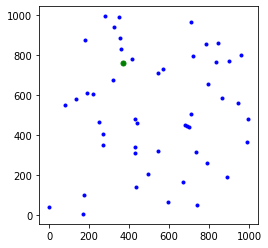

In [11]:
#@title Завантаження карти міст та реєестрація операторів ініціалізації особини і популяції

filename='map50.dat' #@param ['map10.dat', 'map50.dat']

toolbox_definition(filename)


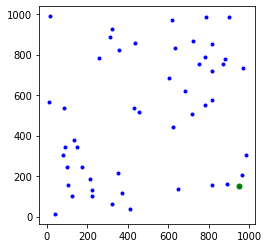

In [28]:
#@ Генерація карти міст та реєстрація операторів ініціалізації особини та популяції

cities_count =  50#@param {type:"integer"}

gen_random()

In [112]:
#@title Визначення параметрів задачі та генетичного алгоритму, реєстрація генетичних операторів
v_final =  1#@param {type:"number"}

population_size =  500#@param {type:"integer"}

selection = 'tournament' #@param ["tournament", "roulette", "lexicase"]

tournsize =  2#@param {type:"integer"}

crossover = 'ordered crossover (2OX)' #@param ["ordered crossover (2OX)", "partially matched crossover (PMX)"]

cxpb = 0.55 #@param {type:"number"}

mutpb = 0.01 #@param {type:"number"}

indpb = 0.008 #@param {type:"number"}

ngen =  500#@param {type:"integer"} 

if crossover=="ordered crossover (2OX)":
  crossover_function=tools.cxOrdered
else: 
  crossover_function=tools.cxPartialyMatched

if selection=='tournament':
  selection_function=tools.selTournament  
  toolbox.register("select", selection_function, tournsize=tournsize)
  
elif selection=='roulette':
  selection_function=tools.selRoulette
  toolbox.register("select", selection_function)
else:
  selection_function=tools.selLexicase
  toolbox.register("select", selection_function)



toolbox.register("mate", crossover_function)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=indpb)
toolbox.register("evaluate", evalTSP)

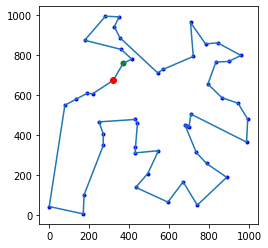

Найкраща особина: 0.00017058315720747285


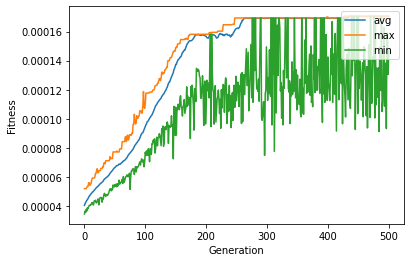

Шлях та час: (5861.243473332737, 5861.243473332737)
Використані параметри:
v_final: 1
population_size: 500
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.55
mutpb: 0.01
indpb: 0.008
ngen: 500


In [113]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')


# Обчислені комірки

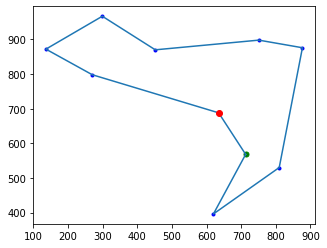

Найкраща особина: 0.00044308417578352706


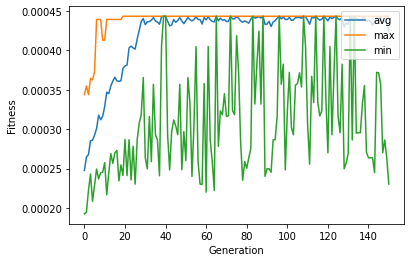

Шлях та час: (2255.9075012251383, 2255.9075012251383)
Використані параметри:
v_final: 1.0
population_size: 50
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.6
mutpb: 0.1
indpb: 0.05
ngen: 150


In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')


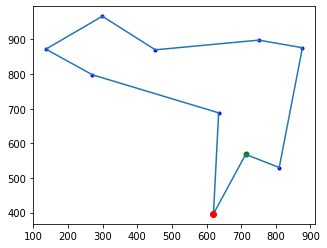

Найкраща особина: 0.0006419385780586286


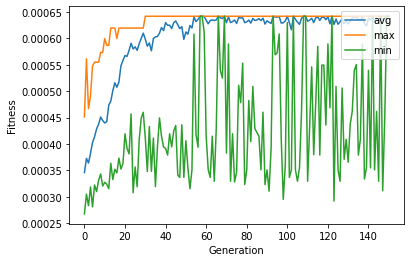

Шлях та час: (2276.8484664393054, 1556.7814360748225)
Використані параметри:
v_final: 2.0
population_size: 50
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.6
mutpb: 0.1
indpb: 0.05
ngen: 150


In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')


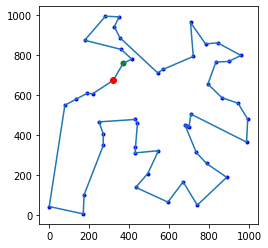

Найкраща особина: 0.00017058315720747285


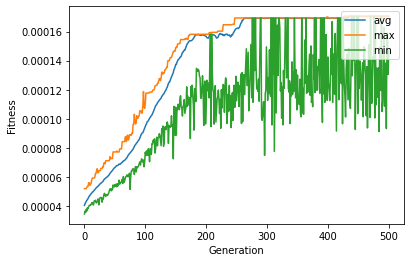

Шлях та час: (5861.243473332737, 5861.243473332737)
Використані параметри:
v_final: 1
population_size: 500
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.55
mutpb: 0.01
indpb: 0.008
ngen: 500


In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')


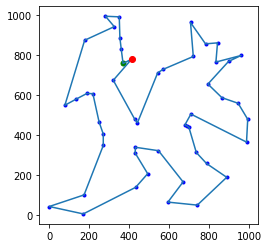

Найкраща особина: 0.00016479329611533805


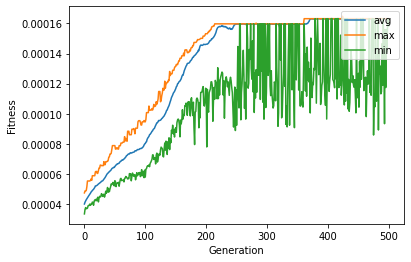

Шлях та час: (6067.208013146996, 6067.208013146996)
Використані параметри:
v_final: 1
population_size: 500
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.55
mutpb: 0.01
indpb: 0.008
ngen: 500


In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')


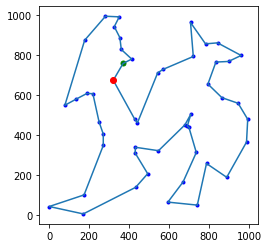

Найкраща особина: 0.000315401438428171


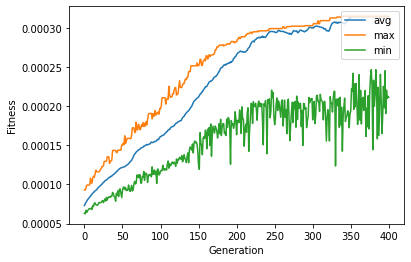

Шлях та час: (5921.827854289574, 3169.562585204374)
Використані параметри:
v_final: 3
population_size: 1000
selection: tournament
crossover: ordered crossover (2OX)
cxpb: 0.55
mutpb: 0.01
indpb: 0.008
ngen: 400


In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

draw_plot(cities,hof[0])

best_individual=hof[0]
print("Найкраща особина: %s" % best_individual.fitness.values)

x,y=log.select("gen", "avg")
plt.plot(x, y, label='avg')
plt.xlabel("Generation")
plt.ylabel("Fitness")
x,y=log.select("gen", "max")
plt.plot(x, y, label='max')
x,y=log.select("gen", "min")
plt.plot(x, y, label='min' )
plt.legend(loc="upper right")
plt.show()


print (f'Шлях та час: {complete_dist_and_time(best_individual)}')

print ('Використані параметри:')
print (f'v_final: {v_final}')
print (f'population_size: {population_size}')
print (f'selection: {selection}')
print (f'crossover: {crossover}')
print (f'cxpb: {cxpb}')
print (f'mutpb: {mutpb}')
print (f'indpb: {indpb}')
print (f'ngen: {ngen}')
